In [1]:
"""
    Author : Teaching Assistants of LELEC210X - UCLouvain
    Date : 21/11/2023

    Code description :
    __________________
    Automatically write a Hz2Mel transformation matrix as float 2D array in c file.

"""
import os
from shutil import copyfile

import librosa  # For audio signal computations as MFCC
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal


def updir(path, n):
    for _ in range(n):
        path = os.path.dirname(path)
    return path


from classification.utils.utils import float2fixed

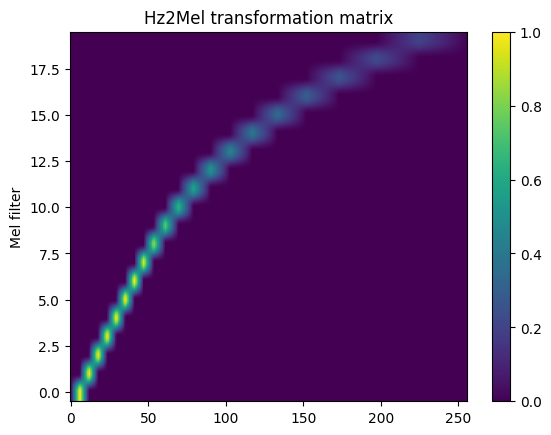

height = 20, width = 256


In [2]:
Nft = 512
fs = 11025  # Hz
n_mels = 20

"Using librosa library"
plt.figure()
mel = librosa.filters.mel(sr=fs, n_fft=Nft, n_mels=n_mels)
mel = mel[:, :-1]

"Normalization"
mel = mel / np.max(mel)

plt.imshow(mel, aspect="auto")
plt.gca().invert_yaxis()
plt.ylabel("Mel filter")
plt.colorbar()
plt.title("Hz2Mel transformation matrix")
plt.show()

H, W = mel.shape
print(f"height = {H}, width = {W}")

## Signal format

In [3]:
"Option"
hardcoded_format = "q15"  #'q15'#'q31' #'float32'

mel_q15 = float2fixed(mel, 1)
mel_q31 = float2fixed(mel, 1, q=31)

# print(mel_q15[0,:10])
# print(mel_q31[0,:10])

if hardcoded_format == "q15":
    mat = mel_q15
    zero = str(0)
elif hardcoded_format == "q31":
    mat = mel_q31
    zero = str(0)
else:
    mat = mel
    zero = str(0.0)

hardcoded_type = "real"  #'real', 'complex'
if hardcoded_type == "real":
    width = W
elif hardcoded_type == "complex":
    width = 2 * W

## Open file and write content in it

In [20]:
mcu_project_name = "hands_on_feature_vectors"

filename = os.path.join(
    updir(os.getcwd(), 2),
    fr"mcu\{mcu_project_name}\Core\Inc\spectrogram_tables.h",
)
temp = os.path.join(
    updir(os.getcwd(), 2), f"mcu\\{mcu_project_name}\\Core\\Inc\\temp.h"
)

f = open(filename)
f2 = open(temp, "w")


# Copy and paste what is before the window
bool_write = 1
for _, line in enumerate(f):
    print(line)
    if "hz2mel_mat" in line:
        bool_write = 0
        break

    f2.write(line)

# Write hz2mel_mat
f2.write(hardcoded_format + "_t hz2mel_mat[" + str(H) + "*" + str(width) + "] = { \n")
# ___________________________________________________________________________
if hardcoded_type == "real":
    # Write first line
    for j in range(W - 1):
        f2.write(str(mat[0, j]) + ",")  # 0 is for imaginary part
    f2.write(str(mat[0, -1]))
    # Write other lines
    for i in np.arange(1, H):
        for j in range(W - 1):
            f2.write(str(mat[i, j]) + ",")
        f2.write(str(mat[i, -1]))
    f2.write("\n};")

# ___________________________________________________________________________
if hardcoded_type == "complex":
    # Write first line
    for j in range(W - 1):
        f2.write(str(mat[0, j]) + "," + zero + ",")  # 0 is for imaginary part
    f2.write(str(mat[0, -1]) + "," + zero)
    # Write other lines
    for i in np.arange(1, H):
        for j in range(W - 1):
            f2.write(str(mat[i, j]) + "," + zero + ",")
        f2.write(str(mat[i, -1]) + "," + zero)
    f2.write("\n};")

# make space
f2.write("\n")

# Copy and paste what is after the window
for _, line in enumerate(f):
    print(line)

    if bool_write:
        f2.write(line)

    if "};" in line:
        bool_write = 1

f.close()
f2.close()
copyfile(temp, filename)
os.remove(temp)

/*

 * spectrogram_tables.h

 *

 *  Created on: Nov 21, 2023

 *      Author: Teaching Assistants of LELEC210x

 *      This content is generated from python scripts

 */



#ifndef INC_SPECTROGRAM_TABLES_H_

#define INC_SPECTROGRAM_TABLES_H_



#include "arm_math.h"



q15_t hz2mel_mat[20*256] = {

 0,5689,11379,17069,22759,28448,32680,26991,21301,15611,9921,4231,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

 0,0,0,0,0,0,728,6418,12108,17798,23488,29177,31951,26262,20572,14882,9192,3502,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,